# Verification tests on DC2 metacal catalog
Owner: Francois Lanusse 
Last Run: May 9th, 2019

This notebook intends to demonstrates the data access to a metacal catalog produced with the stack, through the GCR, as well running some basic checks.

In [3]:
%pylab inline

# Temporary fix while GCRCatalogs is updated
import sys
sys.path.insert(0, '/global/homes/f/flanusse/repo/gcr-catalogs/') # You need this branch: https://github.com/LSSTDESC/gcr-catalogs/tree/u/EiffL/metacal
import GCRCatalogs

Populating the interactive namespace from numpy and matplotlib


In [66]:
metacal = GCRCatalogs.load_catalog('dc2_metacal_run1.2i_tract5063.yaml');

/global/homes/f/flanusse/.local/lib/python3.7/site-packages/GCRCatalogs/dc2_metacal.py:279: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(schema_stream)
/global/homes/f/flanusse/.local/lib/python3.7/site-packages/GCRCatalogs/dc2_metacal.py:208: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  base_dict = yaml.load(ofile)


In [68]:
# Let's compute some derived quantities for basic checks
mag_i = -2.5*log10(metacal['mcal_gauss_flux_i']) + 27
mag_r = -2.5*log10(metacal['mcal_gauss_flux_r']) + 27
mag_z = -2.5*log10(metacal['mcal_gauss_flux_z']) + 27

# These are measured by the stack
lsst_mag = -2.5*log10(metacal['modelfit_CModel_instFlux']) + 27
lsst_snr = metacal['modelfit_CModel_instFlux'] / metacal['modelfit_CModel_instFluxErr']

# We only have access to the reference catalog for now, so let's only select objects with i-band as the reference
mask = metacal['merge_measurement_i']
mask &= metacal['clean'] & (metacal['mcal_flags'] == 0) # Apply some quality cuts

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipi

## Measured signal to noise

Here we try to compare SNR estimates from the stack using CModel fluxes to the metacal estimate

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


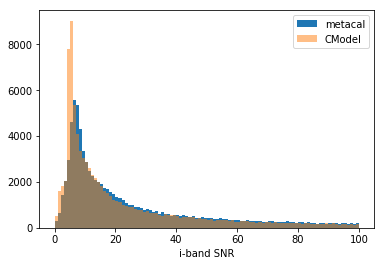

In [74]:
hist(metacal['mcal_s2n_i'][mask],100,range=[0,100], label='metacal');
hist(lsst_snr[mask],100,range=[0,100],alpha=0.5, label='CModel');
xlabel('i-band SNR');
legend();

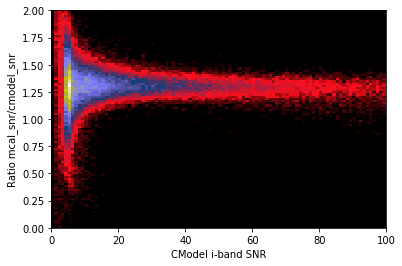

In [87]:
hist2d(lsst_snr[mask], metacal['mcal_s2n_i'][mask] /lsst_snr[mask], 100,range=[[0,100], [0,2]],cmap='gist_stern');
xlabel('CModel i-band SNR');
ylabel('Ratio mcal_snr/cmodel_snr');

Ok, so there seems to be constant factor between the two SNR estimates...

## Comparing fluxes and magnitudes

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'i-mag')

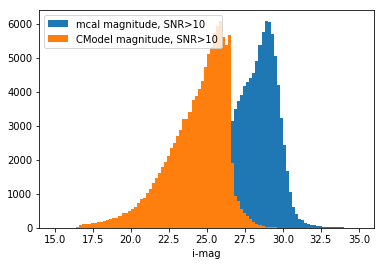

In [89]:
hist(mag_i[mask],100,range=[15,35], label='mcal magnitude, SNR>10');
hist(lsst_mag[mask],100,range=[15,35], label='CModel magnitude, SNR>10');
legend()
xlabel('i-mag')

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


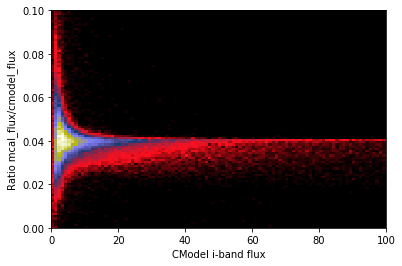

In [93]:
hist2d(metacal['modelfit_CModel_instFlux'][mask], metacal['mcal_flux_i'][mask] / metacal['modelfit_CModel_instFlux'][mask], 100,range=[[0,100], [0,0.1]], cmap='gist_stern');
xlabel('CModel i-band flux');
ylabel('Ratio mcal_flux/cmodel_flux');

## Evaluate multiplicative estimator bias

In [95]:
delta_gamma = 0.001 # To be checked... this is just a guess
R_1 = (metacal['mcal_g_1p'][mask] - metacal['mcal_g_1m'][mask]) / delta_gamma
R_2 = (metacal['mcal_g_2p'][mask] - metacal['mcal_g_2m'][mask]) / delta_gamma

In [98]:
R = np.zeros((len(R_1),2,2))
R[:,0,0] = R_1[:,0]
R[:,0,1] = R_1[:,1]
R[:,1,0] = R_2[:,0]
R[:,1,1] = R_2[:,1]

m1 = np.mean(R[:,0,0]) # R11, taking the mean for the bin, TODO check if that's what we want to do
m2 = np.mean(R[:,1,1]) #R22

In [102]:
g1 = metacal['mcal_g'][mask][:,0]
g2 = metacal['mcal_g'][mask][:,1]

mg1 = (g1 -  g1.mean()) / m1
mg2 = (g2 -  g2.mean()) / m2

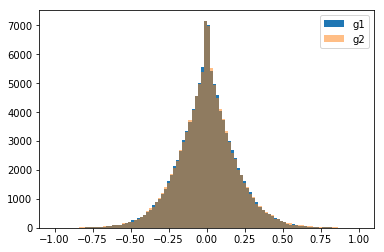

In [114]:
hist(g1,100,range=[-1,1], label='g1');
hist(g2,100,alpha=0.5,range=[-1,1], label='g2');
legend()

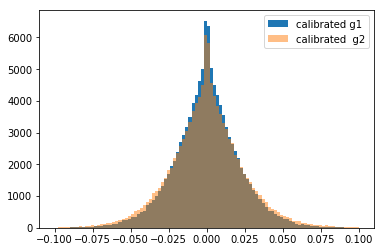

In [112]:
hist(mg1,100,range=[-0.1,0.1], label='calibrated g1');
hist(mg2,100,range=[-0.1,0.1],alpha=0.5, label='calibrated  g2');
legend()